In [13]:
import pyzx as zx
import random
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, ParameterVector

In [14]:
def generate_H_S_CNOT_T_circuit(qubits, gates, p_t=0, seed=1000):
    random.seed(seed)  
    p_s = 0.333 * (1.0 - p_t)  
    p_had = 0.333 * (1.0 - p_t)  
    p_cnot = 0.333 * (1.0 - p_t)  

    c = zx.Circuit(qubits) 
    for _ in range(gates):
        r = random.random() 
        if r < p_had:
            c.add_gate("HAD", random.randrange(qubits))
        elif r < p_had + p_s:
            c.add_gate("S", random.randrange(qubits))
        elif r < p_had + p_s + p_t:
            c.add_gate("T", random.randrange(qubits))
        else:
            tgt = random.randrange(qubits)
            while True:
                ctrl = random.randrange(qubits)
                if ctrl != tgt:
                    break
            c.add_gate("CNOT", tgt, ctrl)
    return c

In [26]:
#seed固定
random.seed(1000)

c = generate_H_S_CNOT_T_circuit(qubits = 4 ,gates=30, p_t = 0.1, seed =1000)
print(c.stats())
zx.draw(c)
qasm_str_bef = c.to_basic_gates().to_qasm()
circuit_qiskit_bef = QuantumCircuit.from_qasm_str(qasm_str_bef)
print("gate_num", circuit_qiskit_bef.size())
print("gate_count", circuit_qiskit_bef.count_ops())
print("depth", circuit_qiskit_bef.depth())

#普通の最適化
c = zx.optimize.basic_optimization(c.split_phase_gates(),quiet=True)
#print(c.stats())
#zx.draw(c)
#グラフ変換
g = c.to_graph()

zx.simplify.clifford_simp(g,quiet=False)
#g.normalize()
#zx.draw(g)

c = zx.extract.streaming_extract(g.copy())
print(c.to_basic_gates().stats_dict())
zx.draw(c.to_basic_gates())


qasm_str_aft = c.to_basic_gates().to_qasm()
circuit_qiskit_aft = QuantumCircuit.from_qasm_str(qasm_str_aft)

print("gate_num", circuit_qiskit_aft.size())
print("gate_count", circuit_qiskit_aft.count_ops())
print("depth", circuit_qiskit_aft.depth())


Circuit  on 4 qubits with 30 gates.
        5 is the T-count
        25 Cliffords among which
        8 2-qubit gates (8 CNOT, 0 other) and
        11 Hadamard gates.


gate_num 30
gate_count OrderedDict([('h', 11), ('cx', 8), ('s', 6), ('t', 5)])
depth 14
spider_simp: 5. 2. 1.  3 iterations
id_simp: 2.  1 iterations
lcomp_simp: 1.  1 iterations
pivot_boundary_simp: 1. 1.  2 iterations
lcomp_simp: 1. 1.  2 iterations
This function is deprecated. Call extract_circuit() instead.
{'name': '', 'qubits': 4, 'gates': 32, 'tcount': 5, 'clifford': 27, 'twoqubit': 10, 'cnot': 0, 'had': 16, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}


gate_num 32
gate_count OrderedDict([('h', 16), ('cz', 10), ('rz', 6)])
depth 19


{'name': '', 'qubits': 4, 'gates': 32, 'tcount': 5, 'clifford': 27, 'twoqubit': 10, 'cnot': 0, 'had': 16, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
gate_count OrderedDict([('h', 16), ('cz', 10), ('rz', 6)])


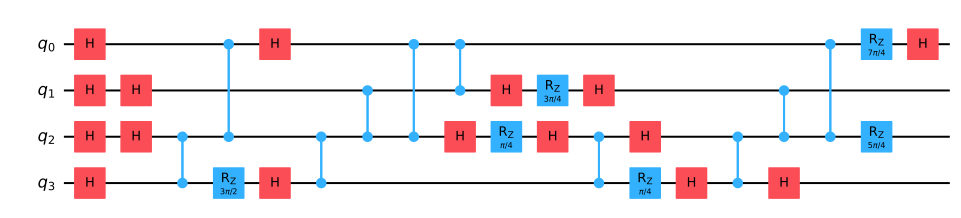

In [27]:
print(c.to_basic_gates().stats_dict())
print("gate_count", circuit_qiskit_aft.count_ops())
circuit_qiskit_aft.draw('mpl')

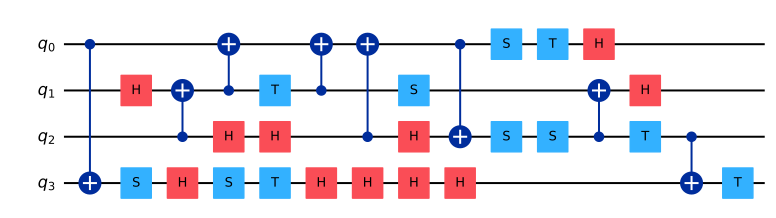

In [28]:
circuit_qiskit_bef.draw('mpl')